In [121]:
import pandas as pd

dt = pd.read_csv("flipkart_smartphones.csv")
print(dt.head())

    brand             model           colour  original_price  \
0    VIVO      VIVO T1 44W        Starry Sky           19990   
1   APPLE  APPLE IPHONE 11             White           48900   
2    VIVO      VIVO T1 44W   Midnight Galaxy           20990   
3  XIAOMI       POCO M4 5G       Power Black           15999   
4  XIAOMI         REDMI 10   Caribbean Green           14999   

   discounted_price  ratings  rating_count  reviews  memory  storage  \
0             14499      4.5         87331     6044     4.0    128.0   
1             47199      4.6        184191    10818     NaN    128.0   
2             15999      4.4         51365     3750     6.0    128.0   
3             11999      4.2         53448     4185     4.0     64.0   
4              9299      4.3        187787    12084     4.0     64.0   

                 processor        rear_camera front_camera  display_size  \
0  Qualcomm Snapdragon 680  50MP + 2MP + 2MP          16MP         16.36   
1            A Bionic Chip    

**O que é o projeto?**
Um algoritmo que prevê o preço de um celular com base em algumas informações:
Marca, cor, tamanho da tela, avaliações e tipo de bateria

In [122]:
dt.columns

Index(['brand', 'model', 'colour', 'original_price', 'discounted_price',
       'ratings', 'rating_count', 'reviews', 'memory', 'storage', 'processor',
       'rear_camera', 'front_camera', 'display_size', 'battery_capacity',
       'battery_type'],
      dtype='object')

In [123]:
df_encoded = pd.get_dummies(dt['brand'], prefix='Marca')

# Concatena o DataFrame original com o DataFrame resultante do one-hot encoding
dt = pd.concat([dt, df_encoded], axis=1)

df_encoded = pd.get_dummies(dt['colour'], prefix='Cor')

# Concatena o DataFrame original com o DataFrame resultante do one-hot encoding
dt = pd.concat([dt, df_encoded], axis=1)


# Imprime o DataFrame final
print(dt)

      brand             model               colour  original_price  \
0      VIVO      VIVO T1 44W            Starry Sky           19990   
1     APPLE  APPLE IPHONE 11                 White           48900   
2      VIVO      VIVO T1 44W       Midnight Galaxy           20990   
3    XIAOMI       POCO M4 5G           Power Black           15999   
4    XIAOMI         REDMI 10       Caribbean Green           14999   
..      ...               ...                  ...             ...   
831  REALME  REALME GT NEO 2              NEO Blue           38999   
832  REALME  REALME GT NEO 2             NEO Black           38999   
833  REALME  REALME GT NEO 2             NEO Black           34999   
834  REALME   REALME X50 PRO              Rust Red           17999   
835  XIAOMI      POCO M2 PRO   Two Shades of Black           17999   

     discounted_price  ratings  rating_count  reviews  memory  storage  ...  \
0               14499      4.5         87331     6044     4.0    128.0  ...   
1

Excluir colunas desnecessárias

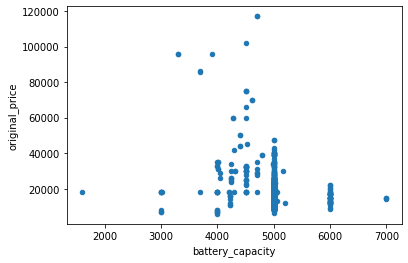

(629, 403)

In [124]:
import matplotlib.pyplot as plt
dt = dt.drop("discounted_price", axis=1)
dt = dt.drop("processor", axis=1)
dt = dt.drop("model", axis=1)
dt = dt.drop("rear_camera", axis=1)
# dt = dt.drop("front_camera", axis=1)
dt = dt.drop("battery_type", axis=1)
dt = dt.drop("colour", axis=1)
dt = dt.drop("brand", axis=1)

# dt.isnull().sum()

dt.dropna(inplace=True, axis=0)

dt.isnull().sum()

dt.head()

dt.Marca_ONEPLUS = dt.Marca_ONEPLUS.astype("float")
dt['front_camera'] = dt['front_camera'].str.extract('(\d+)').astype(int)

dt.plot(x="battery_capacity", y="original_price", kind="scatter")

plt.show()

dt.shape

In [125]:
dt.columns

Index(['original_price', 'ratings', 'rating_count', 'reviews', 'memory',
       'storage', 'front_camera', 'display_size', 'battery_capacity',
       'Marca_APPLE',
       ...
       'Cor_Vintage Bronze', 'Cor_Vinyl Black', 'Cor_Volcanic Grey',
       'Cor_Warm Grey', 'Cor_Waterfall Blue', 'Cor_Watery Grey',
       'Cor_Wave Green', 'Cor_White', 'Cor_White Lily', 'Cor_Yellow'],
      dtype='object', length=403)

In [126]:
from sklearn.model_selection import train_test_split

X = dt.drop("original_price", axis=1)
y = dt.original_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

print("Score")

print(reg.score(X_train, y_train))

# Testando com árvore de decisão

from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Na árvore de decisão: {}".format(accuracy))

## Testando..
from sklearn.metrics import mean_absolute_error

pr = reg.predict(X_test)
print(mean_absolute_error(y_test, pr))

Score
0.9409406776725647
Na árvore de decisão: 0.49038461538461536
5102.551268251767


In [128]:
# Testando com Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 0.11057692307692307


In [129]:
# Testando com Regressão Logística

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear', random_state=42)

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")


Acurácia: 0.15384615384615385


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Deploy**

In [130]:
from joblib import dump
dump(reg, "rege.joblib")

data = {
    # "brand": ["APPLE"],
    "ratings": [4.5],
    # "colour": ["White"],
    "rating_count": [30],
    # "review": [50],
    "memory": [4.0],
    "storage": [64.0],
    "front_camera": ["15MP"],
    "battery_capacity": [6000.0],
    "original_price": [0]
}

df = pd.DataFrame(data)

# df = pd.read_csv("producao.csv")
df = dt

In [131]:
from joblib import load

rr = load("rege.joblib")
X = df.drop("original_price", axis=1)
y = df.original_price
y_pred = rr.predict(X)
print(df)
df["original_price"] = y_pred
print(df.head())

import openpyxl

df.to_excel("resultado.xlsx", index=False)

     original_price  ratings  rating_count  reviews  memory  storage  \
0             19990      4.5         87331     6044     4.0    128.0   
2             20990      4.4         51365     3750     6.0    128.0   
3             15999      4.2         53448     4185     4.0     64.0   
4             14999      4.3        187787    12084     4.0     64.0   
5             15999      4.2         53448     4185     4.0     64.0   
..              ...      ...           ...      ...     ...      ...   
829            8999      4.2          1487       89     2.0     32.0   
830           17999      4.5        271179    28996     6.0     64.0   
833           34999      4.4         18194     2478     8.0    128.0   
834           17999      4.4          8689     1232     8.0    128.0   
835           17999      4.4        350744    33202     6.0     64.0   

     front_camera  display_size  battery_capacity  Marca_APPLE  ...  \
0              16         16.36            5000.0            0  